# <center> Graphs for ZO-Ridge Regression
    
This notebook loads the results for ZO-Ridge regression and plot/save the different graphs.

# Import libraries

In [1]:
import sys
sys.path.append('../results')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
path = '../results/results_appendix/results_ridge/'

# Load results

In [3]:
def load_ridge(n,p):
    loss_ful = np.load(path+'loss_ful_ridge_n{}_p{}.npy'.format(n,p))
    loss_uni = np.load(path+'loss_uni_ridge_n{}_p{}.npy'.format(n,p))
    loss_nes = np.load(path+'loss_nes_ridge_n{}_p{}.npy'.format(n,p))
    loss_avg = np.load(path+'loss_avg_ridge_n{}_p{}.npy'.format(n,p))
    loss_avg_is = np.load(path+'loss_avg_is_ridge_n{}_p{}.npy'.format(n,p))
    loss_sqr = np.load(path+'loss_sqr_ridge_n{}_p{}.npy'.format(n,p))
    loss_sqr_is = np.load(path+'loss_sqr_is_ridge_n{}_p{}.npy'.format(n,p))
    loss_abs = np.load(path+'loss_abs_ridge_n{}_p{}.npy'.format(n,p))
    loss_abs_is = np.load(path+'loss_abs_is_ridge_n{}_p{}.npy'.format(n,p))
    return loss_ful,loss_uni,loss_nes,loss_avg,loss_sqr,loss_abs,loss_avg_is,loss_sqr_is,loss_abs_is

# Plot/Save everything (Appendix E)

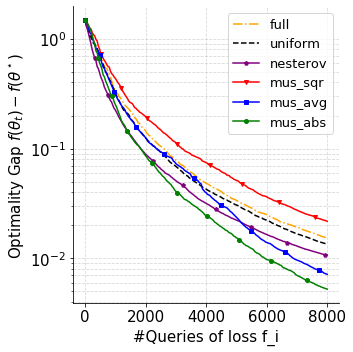

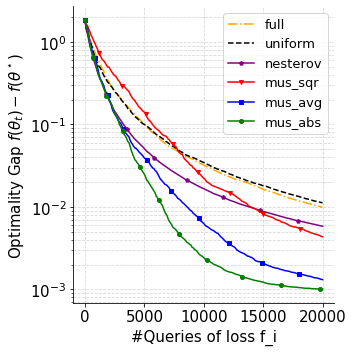

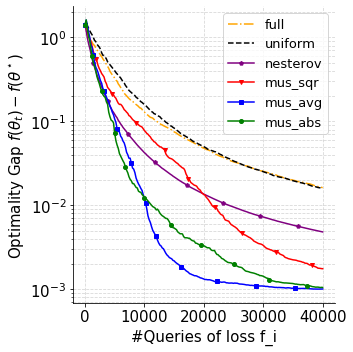

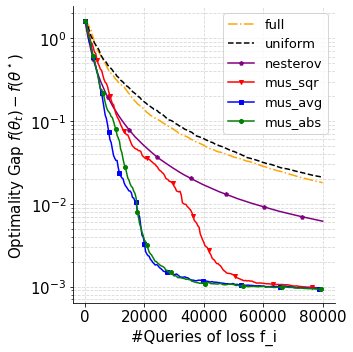

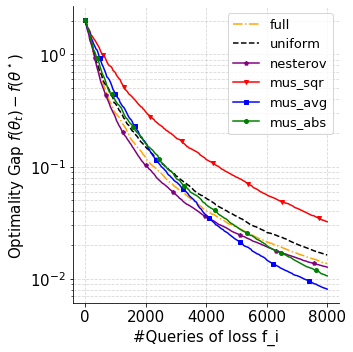

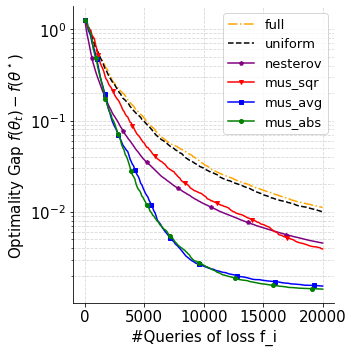

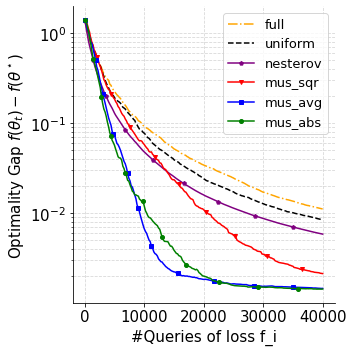

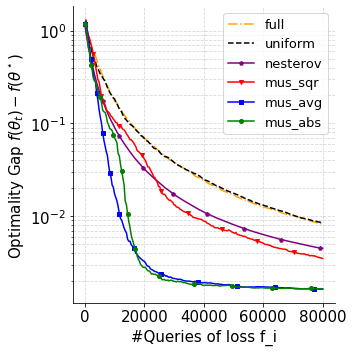

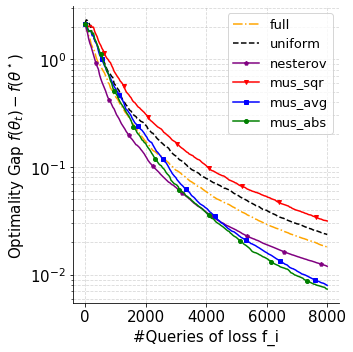

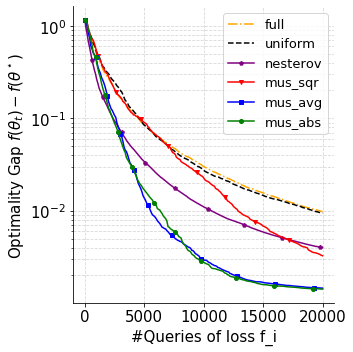

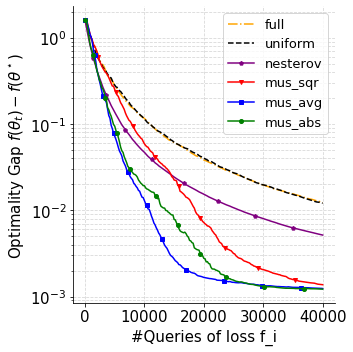

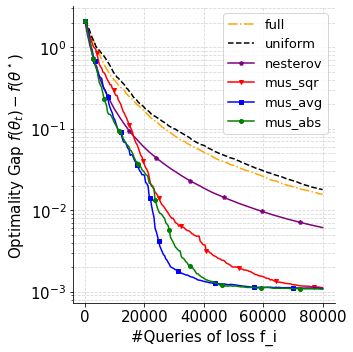

In [4]:
for n in [1000,2000,5000]:
    for p in [20,50,100,200]:
        loss_ful,loss_uni,loss_nes,loss_avg,loss_sqr,loss_abs,loss_avg_is,loss_sqr_is,loss_abs_is = load_ridge(n=n,p=p)
        l_ful = np.mean(loss_ful,axis=0)
        #std_ful = np.std(loss_ful,axis=0)

        l_uni = np.mean(loss_uni,axis=0)
        #std_uni = np.std(loss_uni,axis=0)

        l_nes = np.mean(loss_nes,axis=0)
        #std_nes = np.std(loss_nes,axis=0)

        l_avg = np.mean(loss_avg,axis=0)
        #std_avg = np.std(loss_avg,axis=0)

        l_sqr = np.mean(loss_sqr,axis=0)
        #std_sqr = np.std(loss_sqr,axis=0)

        l_abs = np.mean(loss_abs,axis=0)
        #std_abs = np.std(loss_abs,axis=0)
        
        l_avg_is = np.mean(loss_avg_is,axis=0)
        l_sqr_is = np.mean(loss_sqr_is,axis=0)
        l_abs_is = np.mean(loss_abs_is,axis=0)
        
        N = 200
        tab = np.arange(N+1)
        #plt.figure()
        fig,ax = plt.subplots(figsize=(5,5))
        plt.plot(l_ful,color='orange',linestyle='dashdot',label='full')
        plt.plot(l_uni,color='k',linestyle='--',label='uniform')
        plt.plot(l_nes,color='purple',marker='p',markevery=0.1,ms=4,label='nesterov')
        plt.plot(l_sqr,color='red',marker='v',markevery=0.1,ms=4,label='mus_sqr')
        #plt.plot(l_sqr_is,color='red',linestyle='dashdot',marker='v',markevery=0.1,ms=4,label='mus_sqr_is')
        plt.plot(l_avg,color='b',marker='s',markevery=0.1,ms=4,label='mus_avg')
        #plt.plot(l_avg_is,color='b',linestyle='dashdot',marker='s',markevery=0.1,ms=4,label='mus_avg_is')
        plt.plot(l_abs,color='green',marker='o',markevery=0.1,ms=4,label='mus_abs')
        #plt.plot(l_abs_is,color='green',linestyle='dashdot',marker='o',markevery=0.1,ms=4,label='mus_abs_is')

        # standard deviations
        #plt.fill_between(tab,l_ful-std_ful/2,
        #                 l_ful+std_ful/2,alpha=0.05,color='orange')
        #plt.fill_between(tab,l_uni-std_uni/2,
        #                 l_uni+std_uni/2,alpha=0.05,color='k')
        #plt.fill_between(tab,l_sqr-std_sqr/3,
        #                 l_sqr+std_sqr/2,alpha=0.05,color='red')
        #plt.fill_between(tab,l_avg-std_avg/3,
        #                 l_avg+std_avg/2,alpha=0.05,color='b')
        #plt.fill_between(tab,l_abs-std_abs/3,
        #                 l_abs+std_abs/2,alpha=0.05,color='green')
        #plt.fill_between(tab,l_nes-std_nes/2,
        #                 l_nes+std_nes/2,alpha=0.1,color='purple')

        plt.yscale('log')
        #plt.xscale('symlog')
        plt.ylabel(r'Optimality Gap $f(\theta_t)-f(\theta^\star)$',fontsize=15)
        plt.xlabel('#Queries of loss f_i',fontsize=15)
        labels=2*p*np.array([0,50,100,150,200])
        labs = [str(x) for x in labels]
        plt.xticks(ticks=[0,50,100,150,200],labels=labs,fontsize=15)
        plt.yticks(fontsize=15)
        plt.legend(fontsize=15)
        #plt.legend(loc='lower left',fontsize=15)
        plt.legend(loc='upper right',fontsize=13)
        plt.grid(linestyle='--',which='both',alpha=0.5)
        #plt.title('Ridge Regression',fontsize=15)
        plt.tight_layout()
        ax.spines["right"].set_visible(False)
        ax.spines["top"].set_visible(False)
        #filename = 'zo_ridge_is_n{}_p{}.pdf'.format(n,p)
        #plt.savefig(filename,bbox_inches='tight',transparent=True, pad_inches=0)
        plt.show()